In [2]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
import geoplot
import fiona
import os
import numpy as np
from shapely import geometry

In [4]:
endemic_data = gpd.read_file('./data/endemic_birds.json')
endemic_data

,ASSESSMENT,ID_NO,BINOMIAL,PRESENCE,ORIGIN,SEASONAL,COMPILER,YEAR,CITATION,LEGEND,layer,path,geometry
0,94873079,22724592,Cranioleuca henricae,1,1,1,BirdLife International,1999,BirdLife International and Handbook of the Bir...,Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/cr...,(POLYGON ((-68.02380371099997 -16.617797850999...
1,131382876,22685572,Ara rubrogenys,3,1,1,Hannah Wheatley (BirdLife International),2018,BirdLife International and Handbook of the Bir...,Possibly Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/ar...,POLYGON ((-64.93007148499998 -17.7873070759999...
2,131382876,22685572,Ara rubrogenys,1,1,1,BirdLife International; Hannah Wheatley (BirdL...,2018,BirdLife International and Handbook of the Bir...,Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/ar...,(POLYGON ((-64.12594006899997 -18.132876194999...
3,93866090,22702258,Asthenes harterti,1,1,1,"TNC-Wings, 1999; NatureServe, 2007",2007,BirdLife International and Handbook of the Bir...,Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/as...,POLYGON ((-68.86480712899998 -14.5571899419999...
4,94829047,22723681,Diglossa carbonaria,1,1,1,"NatureServe, 2002",2002,BirdLife International and Handbook of the Bir...,Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/di...,POLYGON ((-67.60540771499996 -16.6173095709999...
5,131323990,22723269,Poospiza garleppi,3,1,1,Hannah Wheatley (BirdLife International),2018,BirdLife International and Handbook of the Bir...,Possibly Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/po...,(POLYGON ((-66.14384896599995 -18.180149639999...
6,131323990,22723269,Poospiza garleppi,1,1,1,Joe Taylor (BirdLife International); Rob Marti...,2018,BirdLife International and Handbook of the Bir...,Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/po...,(POLYGON ((-66.42367303499998 -17.339577896999...
7,93169808,22687798,Aglaeactis pamela,1,1,1,"TNC-Wings, 1999; NatureServe, 2002",2002,BirdLife International and Handbook of the Bir...,Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/ag...,POLYGON ((-68.60870361299999 -16.1215209959999...
8,132032705,22728454,Hylopezus auricularis,1,1,1,BirdLife International; Hannah Wheatley (BirdL...,2018,BirdLife International and Handbook of the Bir...,Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/hy...,POLYGON ((-66.20189489899997 -10.9882158819999...
9,132032705,22728454,Hylopezus auricularis,3,1,1,Hannah Wheatley (BirdLife International),2018,BirdLife International and Handbook of the Bir...,Possibly Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/hy...,(POLYGON ((-66.05327964199995 -11.057501759999...


In [5]:
birds = gpd.read_file('data/endemic_birds.json')
birds.head()

,ASSESSMENT,ID_NO,BINOMIAL,PRESENCE,ORIGIN,SEASONAL,COMPILER,YEAR,CITATION,LEGEND,layer,path,geometry
0,94873079,22724592,Cranioleuca henricae,1,1,1,BirdLife International,1999,BirdLife International and Handbook of the Bir...,Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/cr...,(POLYGON ((-68.02380371099997 -16.617797850999...
1,131382876,22685572,Ara rubrogenys,3,1,1,Hannah Wheatley (BirdLife International),2018,BirdLife International and Handbook of the Bir...,Possibly Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/ar...,POLYGON ((-64.93007148499998 -17.7873070759999...
2,131382876,22685572,Ara rubrogenys,1,1,1,BirdLife International; Hannah Wheatley (BirdL...,2018,BirdLife International and Handbook of the Bir...,Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/ar...,(POLYGON ((-64.12594006899997 -18.132876194999...
3,93866090,22702258,Asthenes harterti,1,1,1,"TNC-Wings, 1999; NatureServe, 2007",2007,BirdLife International and Handbook of the Bir...,Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/as...,POLYGON ((-68.86480712899998 -14.5571899419999...
4,94829047,22723681,Diglossa carbonaria,1,1,1,"NatureServe, 2002",2002,BirdLife International and Handbook of the Bir...,Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/di...,POLYGON ((-67.60540771499996 -16.6173095709999...


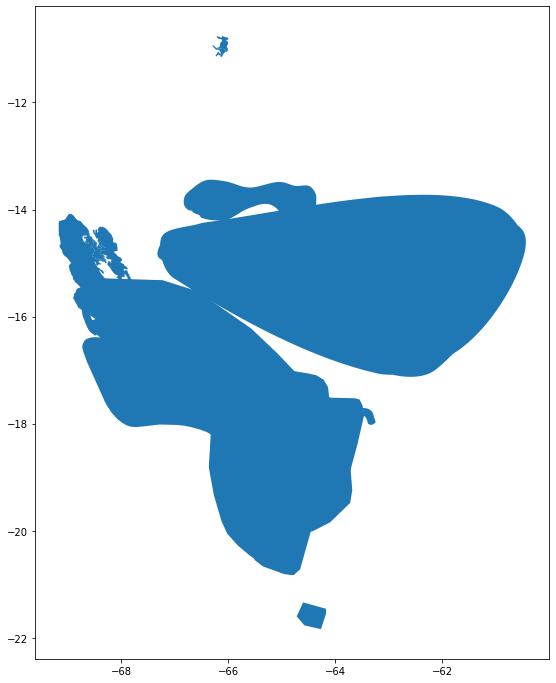

In [15]:
ax = birds.plot(figsize=(12,12));

In [8]:
df = pd.DataFrame(endemic_data)
# Declare a list that is to be converted into a column 
common_name = ['Bolivian Spinetail', 'Red-fronted Macaw', 'Red-fronted Macaw', 'Black-throated Thistletail', 'Grey-bellied Flowerpiercer', 'Cochabamba Mountain-finch', 'Cochabamba Mountain-finch', 'Black-hooded Sunbeam', 'Masked Antpitta', 'Masked Antpitta', 'Bolivian Blackbird', 'Bolivian Earthcreeper', 'Rufous-faced Antpitta', 'Berlepsch Canastero', 'Horned Curassow', 'Horned Curassow', 'Unicolor Thrush', 'Blue-throated Macaw', 'Bolivian Brush-finch', 'Cliff Parakeet', 'Apolo Cotinga', 'Apolo Cotinga']
df['common_name'] = common_name
df

,ASSESSMENT,ID_NO,BINOMIAL,PRESENCE,ORIGIN,SEASONAL,COMPILER,YEAR,CITATION,LEGEND,layer,path,geometry,common_spanish,common_name
0,94873079,22724592,Cranioleuca henricae,1,1,1,BirdLife International,1999,BirdLife International and Handbook of the Bir...,Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/cr...,(POLYGON ((-68.02380371099997 -16.617797850999...,Colaespina Boliviano,Bolivian Spinetail
1,131382876,22685572,Ara rubrogenys,3,1,1,Hannah Wheatley (BirdLife International),2018,BirdLife International and Handbook of the Bir...,Possibly Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/ar...,POLYGON ((-64.93007148499998 -17.7873070759999...,Paraba Frente Roja,Red-fronted Macaw
2,131382876,22685572,Ara rubrogenys,1,1,1,BirdLife International; Hannah Wheatley (BirdL...,2018,BirdLife International and Handbook of the Bir...,Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/ar...,(POLYGON ((-64.12594006899997 -18.132876194999...,Paraba Frente Roja,Red-fronted Macaw
3,93866090,22702258,Asthenes harterti,1,1,1,"TNC-Wings, 1999; NatureServe, 2007",2007,BirdLife International and Handbook of the Bir...,Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/as...,POLYGON ((-68.86480712899998 -14.5571899419999...,Colacardo Garganta Negra,Black-throated Thistletail
4,94829047,22723681,Diglossa carbonaria,1,1,1,"NatureServe, 2002",2002,BirdLife International and Handbook of the Bir...,Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/di...,POLYGON ((-67.60540771499996 -16.6173095709999...,Pinchaflor Vientre Gris,Grey-bellied Flowerpiercer
5,131323990,22723269,Poospiza garleppi,3,1,1,Hannah Wheatley (BirdLife International),2018,BirdLife International and Handbook of the Bir...,Possibly Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/po...,(POLYGON ((-66.14384896599995 -18.180149639999...,Monterita de Cochabamba,Cochabamba Mountain-finch
6,131323990,22723269,Poospiza garleppi,1,1,1,Joe Taylor (BirdLife International); Rob Marti...,2018,BirdLife International and Handbook of the Bir...,Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/po...,(POLYGON ((-66.42367303499998 -17.339577896999...,Monterita de Cochabamba,Cochabamba Mountain-finch
7,93169808,22687798,Aglaeactis pamela,1,1,1,"TNC-Wings, 1999; NatureServe, 2002",2002,BirdLife International and Handbook of the Bir...,Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/ag...,POLYGON ((-68.60870361299999 -16.1215209959999...,Rayo de Sol Boliviano,Black-hooded Sunbeam
8,132032705,22728454,Hylopezus auricularis,1,1,1,BirdLife International; Hannah Wheatley (BirdL...,2018,BirdLife International and Handbook of the Bir...,Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/hy...,POLYGON ((-66.20189489899997 -10.9882158819999...,Tororoi de Riberalta,Masked Antpitta
9,132032705,22728454,Hylopezus auricularis,3,1,1,Hannah Wheatley (BirdLife International),2018,BirdLife International and Handbook of the Bir...,Possibly Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/hy...,(POLYGON ((-66.05327964199995 -11.057501759999...,Tororoi de Riberalta,Masked Antpitta


In [9]:
df = pd.DataFrame(endemic_data)
common_spanish = ['Colaespina Boliviano', 'Paraba Frente Roja', 'Paraba Frente Roja', 'Colacardo Garganta Negra', 'Pinchaflor Vientre Gris', 'Monterita de Cochabamba', 'Monterita de Cochabamba', 'Rayo de Sol Boliviano', 'Tororoi de Riberalta', 'Tororoi de Riberalta', 'Tordo Boliviano', 'Bandurrita Boliviana', 'Tororoi Boliviano', 'Canastero de Berlepsch', 'Paujil Copete de Piedra', 'Paujil Copete de Piedra', 'Zorzal Boliviano', 'Paraba Barba Azul', 'Matorralero Boliviano', 'Cotorra de los Acantilados', 'Palkachupa', 'Palkachupa']
df['common_spanish'] = common_spanish
df

,ASSESSMENT,ID_NO,BINOMIAL,PRESENCE,ORIGIN,SEASONAL,COMPILER,YEAR,CITATION,LEGEND,layer,path,geometry,common_spanish,common_name
0,94873079,22724592,Cranioleuca henricae,1,1,1,BirdLife International,1999,BirdLife International and Handbook of the Bir...,Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/cr...,(POLYGON ((-68.02380371099997 -16.617797850999...,Colaespina Boliviano,Bolivian Spinetail
1,131382876,22685572,Ara rubrogenys,3,1,1,Hannah Wheatley (BirdLife International),2018,BirdLife International and Handbook of the Bir...,Possibly Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/ar...,POLYGON ((-64.93007148499998 -17.7873070759999...,Paraba Frente Roja,Red-fronted Macaw
2,131382876,22685572,Ara rubrogenys,1,1,1,BirdLife International; Hannah Wheatley (BirdL...,2018,BirdLife International and Handbook of the Bir...,Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/ar...,(POLYGON ((-64.12594006899997 -18.132876194999...,Paraba Frente Roja,Red-fronted Macaw
3,93866090,22702258,Asthenes harterti,1,1,1,"TNC-Wings, 1999; NatureServe, 2007",2007,BirdLife International and Handbook of the Bir...,Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/as...,POLYGON ((-68.86480712899998 -14.5571899419999...,Colacardo Garganta Negra,Black-throated Thistletail
4,94829047,22723681,Diglossa carbonaria,1,1,1,"NatureServe, 2002",2002,BirdLife International and Handbook of the Bir...,Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/di...,POLYGON ((-67.60540771499996 -16.6173095709999...,Pinchaflor Vientre Gris,Grey-bellied Flowerpiercer
5,131323990,22723269,Poospiza garleppi,3,1,1,Hannah Wheatley (BirdLife International),2018,BirdLife International and Handbook of the Bir...,Possibly Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/po...,(POLYGON ((-66.14384896599995 -18.180149639999...,Monterita de Cochabamba,Cochabamba Mountain-finch
6,131323990,22723269,Poospiza garleppi,1,1,1,Joe Taylor (BirdLife International); Rob Marti...,2018,BirdLife International and Handbook of the Bir...,Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/po...,(POLYGON ((-66.42367303499998 -17.339577896999...,Monterita de Cochabamba,Cochabamba Mountain-finch
7,93169808,22687798,Aglaeactis pamela,1,1,1,"TNC-Wings, 1999; NatureServe, 2002",2002,BirdLife International and Handbook of the Bir...,Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/ag...,POLYGON ((-68.60870361299999 -16.1215209959999...,Rayo de Sol Boliviano,Black-hooded Sunbeam
8,132032705,22728454,Hylopezus auricularis,1,1,1,BirdLife International; Hannah Wheatley (BirdL...,2018,BirdLife International and Handbook of the Bir...,Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/hy...,POLYGON ((-66.20189489899997 -10.9882158819999...,Tororoi de Riberalta,Masked Antpitta
9,132032705,22728454,Hylopezus auricularis,3,1,1,Hannah Wheatley (BirdLife International),2018,BirdLife International and Handbook of the Bir...,Possibly Extant (resident),data_0,/Users/mane/Mapping/endemic/data_processing/hy...,(POLYGON ((-66.05327964199995 -11.057501759999...,Tororoi de Riberalta,Masked Antpitta


In [10]:
df = gpd.GeoDataFrame(df, geometry='geometry')
df.to_file('MyGeometries.shp', driver='ESRI Shapefile')